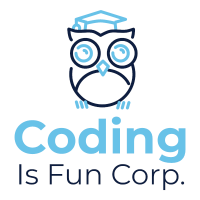

#####  SCENARIO:

> __You are working as a Data Analyst/Scientist in the 'Coding Is Fun Corp.' The CEO wants you to have a look at the commercial data for this year & to present your findings.__ 👩‍💻
___

# Import Libraries & Load Dataset

### Imports

#### Imports

In [1]:
# Version:
# --Python 3.8.5-- 
# autoviz==0.0.81
# numpy==1.19.3
# openpyxl==3.0.5
# pandas==1.2.0
# pandas-profiling==2.9.0
# plotly==4.14.1
# plotly-express==0.4.1
# xlrd==2.0.1

# Imports:
import pandas as pd
import plotly
import plotly.express as px
from pandas_profiling import ProfileReport
from autoviz.AutoViz_Class import AutoViz_Class

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


#### Plotly Template Settings

In [23]:
# -- Settings Plotly template
#      Reference Link:
#      https://plotly.com/python/templates/
#      Try other themes: 'plotly_dark', 'plotly_white', 'ggplot2', 'seaborn', 'simple_white'
template_style = 'plotly_white'

### Load DataFrame

**Load DataFrame and store it in a variable called "df"**

In [3]:
df = pd.read_excel('data/data.xlsx', engine='openpyxl')

**Inspect first 5 rows of the DataFrame**

In [4]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,13,CA-2017-114412,2020-04-15,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,28027,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432
1,24,US-2017-156909,2020-07-16,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196
2,35,CA-2017-107727,2020-10-19,Second Class,MA-17560,Matt Abelman,Home Office,United States,Houston,Texas,77095,Central,OFF-PA-10000249,Office Supplies,Paper,Easy-staple paper,29.472,3,0.2,9.9468
3,42,CA-2017-120999,2020-09-10,Standard Class,LC-16930,Linda Cazamias,Corporate,United States,Naperville,Illinois,60540,Central,TEC-PH-10004093,Technology,Phones,Panasonic Kx-TS550,147.168,4,0.2,16.5564
4,44,CA-2017-139619,2020-09-19,Standard Class,ES-14080,Erin Smith,Corporate,United States,Melbourne,Florida,32935,South,OFF-ST-10003282,Office Supplies,Storage,"Advantus 10-Drawer Portable Organizer, Chrome ...",95.616,2,0.2,9.5616


# Explore Dataset

## Traditionally

In [5]:
# Basic Info about DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         3312 non-null   int64         
 1   Order ID       3312 non-null   object        
 2   Order Date     3312 non-null   datetime64[ns]
 3   Ship Mode      3312 non-null   object        
 4   Customer ID    3312 non-null   object        
 5   Customer Name  3312 non-null   object        
 6   Segment        3312 non-null   object        
 7   Country        3312 non-null   object        
 8   City           3312 non-null   object        
 9   State          3312 non-null   object        
 10  Postal Code    3312 non-null   int64         
 11  Region         3312 non-null   object        
 12  Product ID     3312 non-null   object        
 13  Category       3312 non-null   object        
 14  Sub-Category   3312 non-null   object        
 15  Product Name   3312 n

In [6]:
# Describe Method
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000,3312.000000
mean,5087.107488,56186.515097,221.381418,3.766908,0.156467,28.212340
std,2817.482266,31980.375516,585.257531,2.221776,0.207429,241.864342
min,13.000000,1841.000000,0.444000,1.000000,0.000000,-3839.990400
25%,2655.750000,27978.750000,17.018000,2.000000,0.000000,1.763200
50%,5183.500000,60472.500000,53.810000,3.000000,0.200000,8.296800
75%,7498.250000,90032.000000,205.105700,5.000000,0.200000,28.315125
max,9994.000000,99301.000000,13999.960000,14.000000,0.800000,6719.980800


In [7]:
# Get a view of unique values in column, e.g. 'Ship Mode'
df['Ship Mode'].unique()

array(['Standard Class', 'Second Class', 'First Class', 'Same Day'],
      dtype=object)

In [8]:
# NaN count for each column
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

## Automated Reports

#### Pandas Profiling Report

In [9]:
# Generate Pandas Profiling Report
profile = ProfileReport(df,title="Sale Profiling Report")

# View in Notebook
profile.to_file(output_file='output/output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Export Pandas Profiling Report to HTML
# Already done that

#### Auto Viz Report

Shape of your Data Set: (3312, 20)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  3
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  5
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  6
    Number of NLP String Columns =  1
    Number of Date Time Columns =  1
    Number of ID Columns =  1
    Number of Columns to Delete =  1
    20 Predictors classified...
        This does not include the Target column(s)
        9 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 6


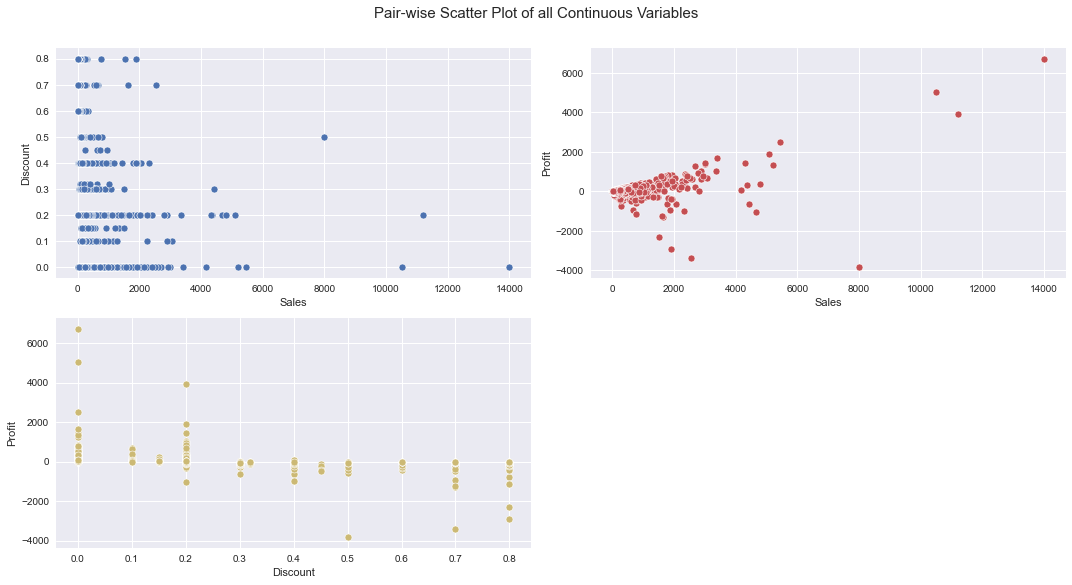

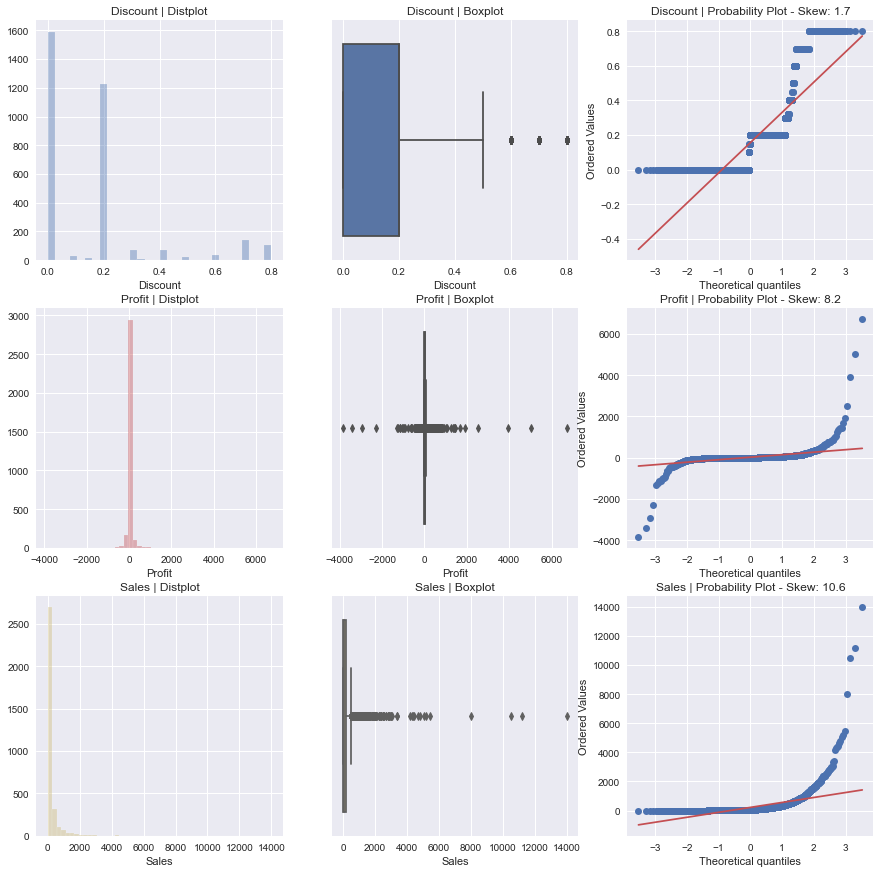

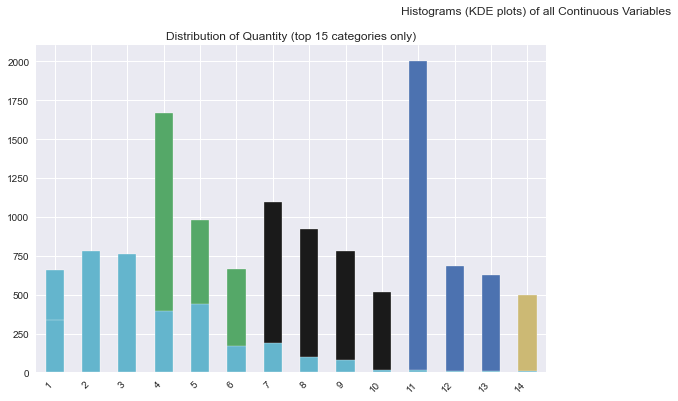

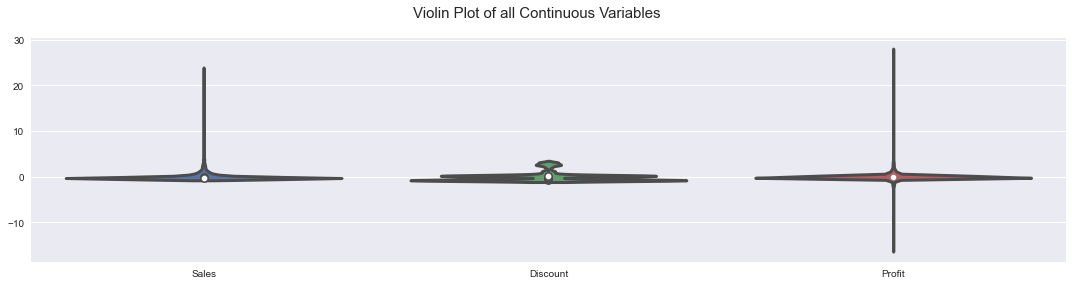

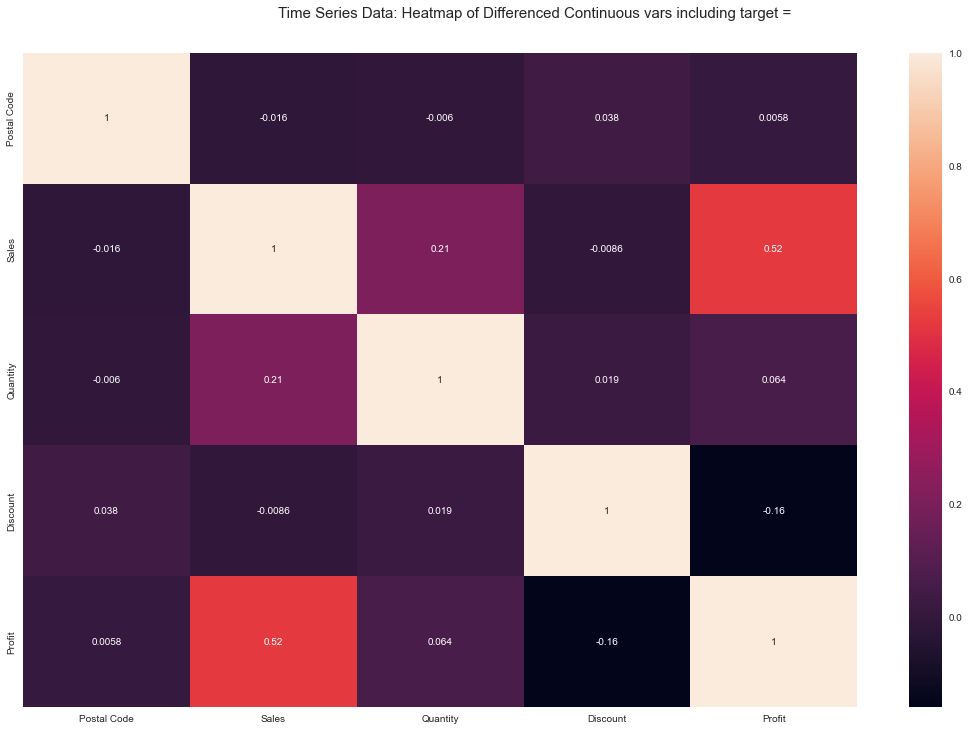

Could not draw Date Vars


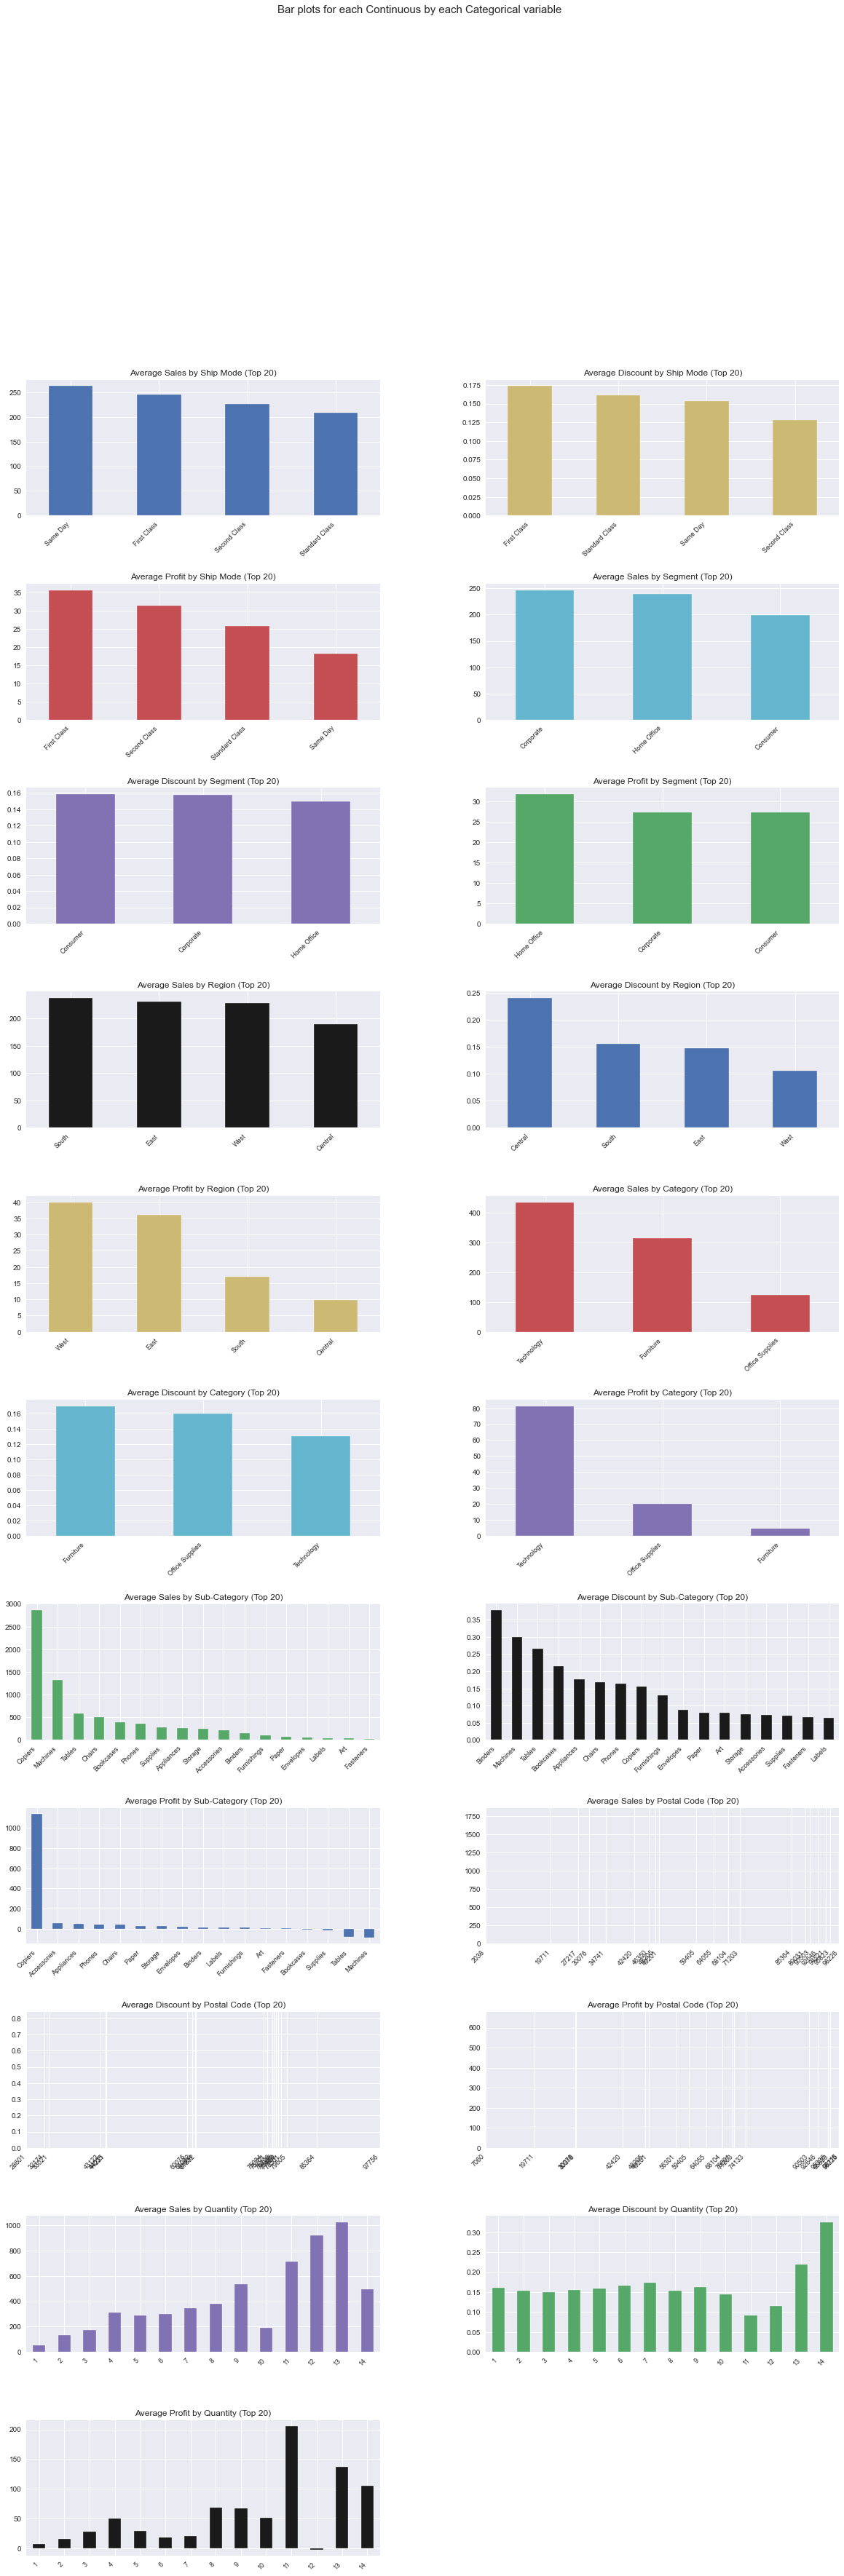

Time to run AutoViz (in seconds) = 9.870

 ###################### VISUALIZATION Completed ########################


In [10]:
AV = AutoViz_Class()
df_autoviz = AV.AutoViz('data/data.xlsx')

# Data Preperation & Analysis

### 🚩 TASKS:
- What was the highest Sale in 2020?
- What is average discount rate of charis?
- Add extra columns to seperate Year & Month from the Order Date
- Add a new column to calculate the Profit Margin for each sales record
- Export manipulated dataframe to Excel
- Create a new dataframe to reflect total Profit & Sales by Sub-Category
- Develop a function, to return a dataframe which is grouped by a particular column (as an input)

**What was the highest Sale?**

In [11]:
# Highest Sale
df.nlargest(1, 'Sales')

,Row ID,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2710,8154,CA-2017-140151,2020-03-23,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,Washington,98115,West,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.96,4,0.0,6719.9808


**What is average Discount of charis?**

In [12]:
# Create Boolean mask
mask = df['Sub-Category'] == 'Chairs'

# Use Boolean mask to filter dataframe
df[mask]['Discount'].mean()

0.16736842105263158

**Add an extra column for "Order Month" & "Order Year"**

In [13]:
df['Order Date Year'] = df['Order Date'].dt.year
df['Order Date Month'] = df['Order Date'].dt.month
df.head(2)

,Row ID,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Date Year,Order Date Month
0,13,CA-2017-114412,2020-04-15,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,...,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432,2020,4
1,24,US-2017-156909,2020-07-16,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,Pennsylvania,...,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196,2020,7


**Add a new column to calculate the Profit Margin for each sales record**

In [41]:
df['Profit Margin'] = df['Profit'] / df['Sales']
df.head(2)

,Row ID,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Date Year,Order Date Month,Profit Margin
0,13,CA-2017-114412,2020-04-15,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,...,Office Supplies,Paper,Xerox 1967,15.552,3,0.2,5.4432,2020,4,0.350000
1,24,US-2017-156909,2020-07-16,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,Pennsylvania,...,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.372,2,0.3,-1.0196,2020,7,-0.014286


**Export manipulated dataframe back to excel**

In [15]:
df.to_excel('output/data_output.xlsx', index=False)

#### Total Profit &Sales by Sub-Category

In [16]:
# Group By Sub-Category [SUM]
df_by_sub_category = df.groupby('Sub-Category').agg({'Profit':'sum', 'Sales':'sum'})
# Reset Index
df_by_sub_category.reset_index(inplace=True)
df_by_sub_category.head(3)

,Sub-Category,Profit,Sales
0,Accessories,15672.3570,59946.232
1,Appliances,7865.2683,42926.932
2,Art,2221.9631,8863.068


#### Develop a function, to return a dataframe which is grouped by a particular column (as an input)

In [17]:
# Groupby as a function
def grouped_data(column_name):
    '''
    Groupby column and returns Dataframe
    Input: Column Name
    '''
    df_tmp = df.groupby(column_name).sum()
    df_tmp.reset_index(inplace=True)
    return df_tmp
    
# Group DataFrame by Segment
grouped_data('Segment')

,Segment,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Order Date Year,Order Date Month,Profit Margin
0,Consumer,8561367,92871614,331904.6999,6282,264.12,45568.2391,3369360,13115,186.803297
1,Corporate,5023960,54879479,241847.8244,3758,154.68,26782.3633,1979600,7679,111.247822
2,Home Office,3263173,38338645,159462.7309,2436,99.42,21088.6672,1341280,4811,86.078886


# Further Deep Dive & Visualization

### 🚩 Objective: 
- Further Analysis/Deep Dive using various kind of Charts
- Prepare/Refactor Dataframe for different Charttypes
- Generate & Export 'Ready-To-Present- Charts': Clean & Interactive
-----
#### 📊 Chart Types:
- [x]  Histogram
- [x] Boxpot
- [x] Various Barplots
- [x] Scatterplot
- [x] Linechart

**Distribution Sales [Histogram]**

In [19]:
# Quick Stats Overview for Sales
df["Sales"].describe()

count     3312.000000
mean       221.381418
std        585.257531
min          0.444000
25%         17.018000
50%         53.810000
75%        205.105700
max      13999.960000
Name: Sales, dtype: float64

In [24]:
# Create Chart
fig = px.histogram(df,
                  x='Sales',
                  template=template_style)
# Plot Chart
fig.show()

**Show the distribution and skewness of Sales [Boxplot]**

In [25]:
# Create Chart
fig = px.box(df, y='Sales', template=template_style)
# Plot Chart
fig.show()

**Plot Sales by Sub-Category**

In [26]:
# Create Dataframe
data = grouped_data('Sub-Category')
data.head()

,Sub-Category,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Order Date Year,Order Date Month,Profit Margin
0,Accessories,1449605,15762114,59946.2320,1079,19.80,15672.3570,555500,2153,62.655000
1,Appliances,874517,9377881,42926.9320,654,29.10,7865.2683,333300,1255,-36.133889
2,Art,1377681,16355998,8863.0680,1101,22.20,2221.9631,569640,2146,70.995000
3,Binders,2500416,29015384,72788.0450,2067,189.10,7669.7418,1010000,3841,-107.832500
4,Bookcases,384522,4483249,30024.2797,276,16.32,-583.6261,153520,552,-11.233641


In [29]:
# Create Chart
fig = px.bar(data,
             x='Sub-Category',
             y='Sales',
             title='<b>Sales by Sub Category</b>',
             template=template_style)

# Display Plot
fig.show()

# Export Chart to HTML
plotly.offline.plot(fig, filename='output/Sales_Sub_Cate.html',)

'output/Sales_Sub_Cate.html'

**Plot Profit by Sub-Category**

In [30]:
# Create Chart
fig = px.bar(data,
            x='Sub-Category',
            y='Profit',
            title='<b>Profit by Sub-Category</b>',
            template=template_style)

# Display Plot
fig.show()

# Export Chart to HTML
plotly.offline.plot(fig, filename='output/Profit_Sub_Cate.hmtl')

'output/Profit_Sub_Cate.hmtl.html'

**Plot Sales & Profit by Sub-Category**

In [31]:
# Create Chart
fig = px.bar(data,
            x='Sub-Category',
            y='Sales',
            color='Profit',
            color_continuous_scale=['red', 'yellow', 'green'],
            template=template_style,
            title='<b>Sale & Profit by Sub Category</b>')

# Display Plot
fig.show()

# Export Chart to HTML
plotly.offline.plot(fig, filename='output/Sales_Profit_Sub_Cate.html')

'output/Sales_Profit_Sub_Cate.html'

#### Inspect Negative Profit of Tables

Is there any linear correlation between Sales/Profit & Discount? [Scatterplot]

In [35]:
# Create Chart
fig = px.scatter(df,
                x='Sales',
                y='Profit',
                color='Discount',
                template=template_style,
                title='<b>Sales/Profit & Discount</b>')

# Display Plot
fig.show()

# Export Chart to HTML
plotly.offline.plot(fig, filename='output/Sales_Profit_Discount.html')

'output/Sales_Profit_Discount.html'

**Check Discount mean by Sub Category**

In [37]:
# Create new dataframe: Group by 'Sub-Category' and aggregate the mean of 'Discount'
df_discount = df.groupby('Sub-Category').agg({'Discount':'mean','Profit':'sum'})

# Display first 5 rows of new dataframe
df_discount.head()

,Discount,Profit
Sub-Category,,
Accessories,0.072000,15672.3570
Appliances,0.176364,7865.2683
Art,0.078723,2221.9631
Binders,0.378200,7669.7418
Bookcases,0.214737,-583.6261


**Plot Mean Discount by Sub Category**

In [39]:
# Create Chart
fig = px.bar(df_discount,
            x=df_discount.index,
            y='Discount',
            color='Profit',
            color_continuous_scale=['red', 'yellow', 'green'],
            template=template_style,
            title='<b>Mean Discount by Sub Category</b>')

# Display Plot


# Export Chart to HTML
plotly.offline.plot(fig, filename='output/Mean_Discount_Sub_Cate.html')

'output/Mean_Discount_Sub_Cate.html'

**Plot Sales & Profit Development for the year 2020**

In [45]:
# Sort Values by Order Date
sort_by_year = df.sort_values(by='Order Date')
# Add cumulative Sales & Profit
sort_by_year['Comulative Sales'] = sort_by_year['Sales'].cumsum()
sort_by_year['Comulative Profit'] = sort_by_year['Profit'].cumsum()
# Print tail & head of sorted dataframe
sort_by_year.tail(5)

,Row ID,Order ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Order Date Year,Order Date Month,Profit Margin,Comulative Sales,Comulative Profit
251,908,CA-2017-143259,2020-12-30,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,...,Gear Head AU3700S Headset,90.930,7,0.0,2.7279,2020,12,0.0300,732918.5552,93351.9738
168,646,CA-2017-126221,2020-12-30,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,Indiana,...,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300,2,0.0,56.5110,2020,12,0.2700,733127.8552,93408.4848
252,909,CA-2017-143259,2020-12-30,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,...,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910,2020,12,0.3750,733180.6312,93428.2758
360,1298,CA-2017-115427,2020-12-30,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,...,GBC Binding covers,20.720,2,0.2,6.4750,2020,12,0.3125,733201.3512,93434.7508
359,1297,CA-2017-115427,2020-12-30,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,...,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,2020,12,0.3250,733215.2552,93439.2696


In [47]:
# Create Chart
fig = px.line(sort_by_year,
             x='Order Date',
             y=['Comulative Sales', 'Comulative Profit'],
             template=template_style,
             title='<b>Sale/Profit Development</b>')
# Display Plot

# Export Chart to HTML
plotly.offline.plot(fig, filename='output/Sale_Profit_Development.html')

'output/Sale_Profit_Development.html'